In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Function for image brightening
def brighten_image(image_path, alpha=1.5, beta=20):
    image = cv2.imread(image_path)
    brightened_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return brightened_image

# Function for image negativization
def negate_image(image_path):
    image = cv2.imread(image_path)
    negated_image = cv2.bitwise_not(image)
    return negated_image

# Function for contrast stretching
def stretch_contrast(image_path, min_out=0, max_out=255):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    min_in, max_in, _, _ = cv2.minMaxLoc(image)
    stretched_image = np.clip((image - min_in) / (max_in - min_in) * (max_out - min_out) + min_out, min_out, max_out).astype(np.uint8)
    return stretched_image

# Function for gamma correction
def gamma_correction(image_path, gamma=1.5):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    gamma_corrected_image = np.power(image / 255.0, gamma) * 255.0
    gamma_corrected_image = gamma_corrected_image.astype(np.uint8)
    return gamma_corrected_image

# Function to display images
def display_images(original, processed, title1, title2):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

    image_path = "pat.jpg"

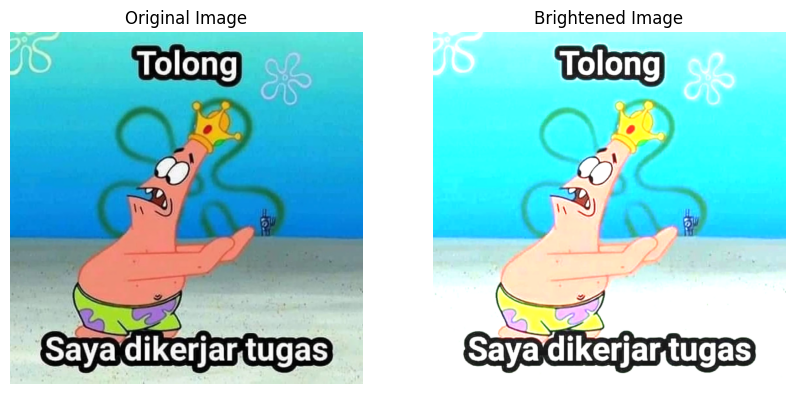

In [6]:
# Image brightening
brightened_img = brighten_image(image_path, alpha=1.5, beta=20)
display_images(cv2.imread(image_path), brightened_img, "Original Image", "Brightened Image")

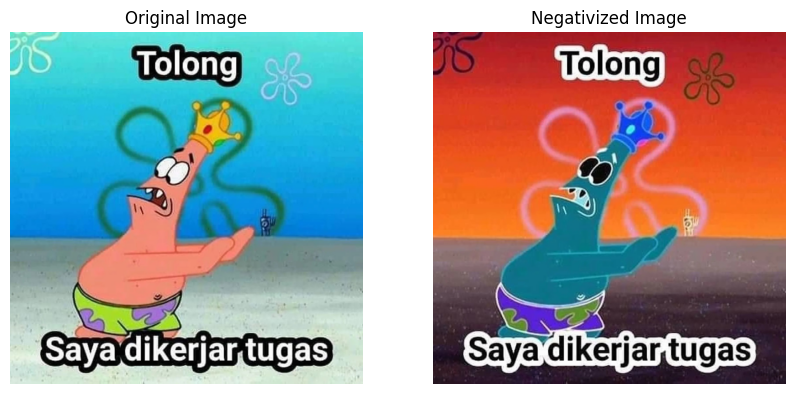

In [7]:
# Image negativization
negated_img = negate_image(image_path)
display_images(cv2.imread(image_path), negated_img, "Original Image", "Negativized Image")

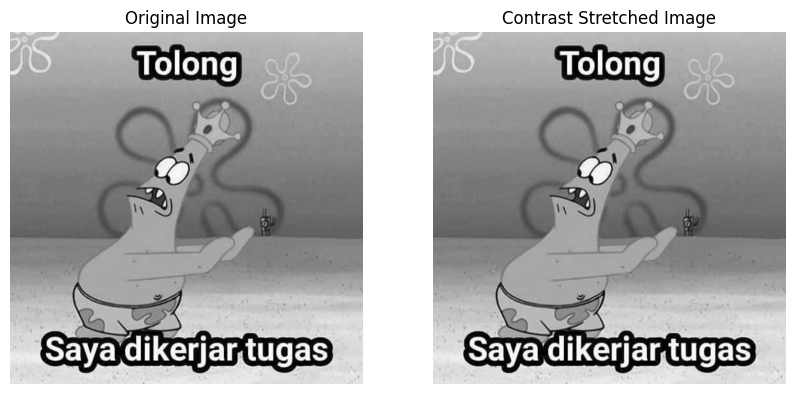

In [8]:
# Contrast stretching
stretched_img = stretch_contrast(image_path, min_out=0, max_out=255)
display_images(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), stretched_img, "Original Image", "Contrast Stretched Image")

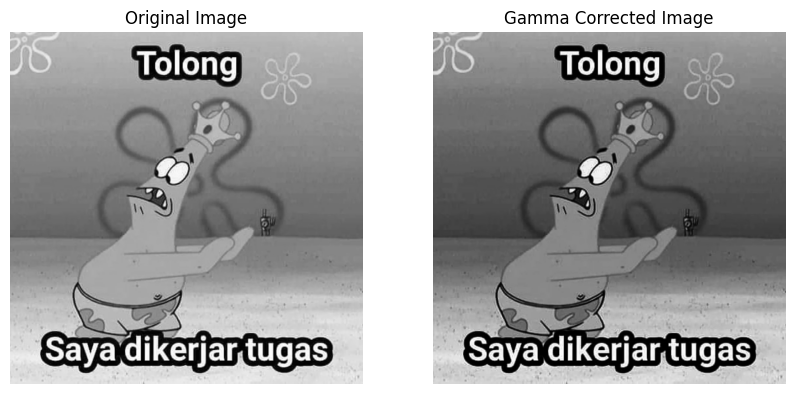

In [9]:
# Gamma correction
gamma_corrected_img = gamma_correction(image_path, gamma=1.5)
display_images(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), gamma_corrected_img, "Original Image", "Gamma Corrected Image")
